Reddit Stock Analysis Project

In this project, I will analyze posts Reddit users post on the Reddit site of wallstreetbets. 

Wallstreetbets, also known as WallStreetBets or WSB, is a subreddit where participants discuss stock and options trading. It has become notable for its profane nature, aggressive trading strategies, and role in the GameStop short squeeze that caused losses on short positions in U.S. firms topping US$70 billion in a few days in early 2021. The subreddit is famous for its colourful lingo and terms.


I will analyze the following: -

-How long the usual title is
-Assign emotions to the post (fear, surprise, happy, sad, angry)
-Analyze how Reddit users felt during the week between January 28, 2022, and February 6, 2022, and what Emotion superseded others.
-Analyze how Reddit users' emotions changed every hour on Friday, 28,2022.
-Find the ten most Common Domains Shared in the URL column
-Relationship between Emotion and Number of Comments
-Relationship between Emotion and the average score 
-Find common words associated with emotions (fear, happy, sad, surprised, angry) 


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import text2emotion as te
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from IPython.display import clear_output 
from raceplotly.plots import barplot

In [2]:
data = pd.read_csv('reddit_wsb.csv')

In [3]:
data.head()

title  score      id  \
0  It's not about the money, it's about sending a...     55  l6ulcx   
1  Math Professor Scott Steiner says the numbers ...    110  l6uibd   
2                                    Exit the system      0  l6uhhn   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...     29  l6ugk6   
4  Not to distract from GME, just thought our AMC...     71  l6ufgy   

                                                 url  comms_num       created  \
0                    https://v.redd.it/6j75regs72e61          6  1.611863e+09   
1                    https://v.redd.it/ah50lyny62e61         23  1.611862e+09   
2  https://www.reddit.com/r/wallstreetbets/commen...         47  1.611862e+09   
3  https://sec.report/Document/0001193125-21-019848/         74  1.611862e+09   
4                https://i.redd.it/4h2sukb662e61.jpg        156  1.611862e+09   

                                                body            timestamp  
0                                                NaN  2021-01-28 21:37:41  
1                                                NaN  2021-01-28 21:32:10  
2  The CEO of NASDAQ pushed to halt trading “to g...  2021-01-28 21:30:35  
3                                                NaN  2021-01-28 21:28:57  
4                                                NaN  2021-01-28 21:26:56

In [4]:
data.isna().sum()

title            0
score            0
id               0
url              0
comms_num        0
created          0
body         15554
timestamp        0
dtype: int64

In [5]:
len(data)

32204

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32204 entries, 0 to 32203
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      32204 non-null  object 
 1   score      32204 non-null  int64  
 2   id         32204 non-null  object 
 3   url        32204 non-null  object 
 4   comms_num  32204 non-null  int64  
 5   created    32204 non-null  float64
 6   body       16650 non-null  object 
 7   timestamp  32204 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.0+ MB


In [7]:
data['timestamp']=pd.to_datetime(data['timestamp'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32204 entries, 0 to 32203
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   title      32204 non-null  object        
 1   score      32204 non-null  int64         
 2   id         32204 non-null  object        
 3   url        32204 non-null  object        
 4   comms_num  32204 non-null  int64         
 5   created    32204 non-null  float64       
 6   body       16650 non-null  object        
 7   timestamp  32204 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 2.0+ MB


In [9]:
data['len']=data['title'].apply(lambda x:len(x.split(' ')))
px.histogram(data['len'],template='plotly_dark')

Most titles are short and contain five words. The usual length of titles are between 0 and 20 words.

In [10]:
data['len'].mode()

0    5
Name: len, dtype: int64

In [11]:
data['len'].mean()

10.900540305552106

In [12]:
data['len'].median()

8.0

In [13]:
t= np.load('another+one.npy',allow_pickle=True)

The file 'another+one.npy' rates the emotions of the posts. i.e. post one rates Happy, Angry and Surprise 0 and gives Fear a rating of one, which means that the user feels more fearful than happy, angry or surprised.

In [14]:
len(t)

32204

In [15]:
t

array([{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0},
       {'Happy': 0.0, 'Angry': 0.25, 'Surprise': 0.25, 'Sad': 0.25, 'Fear': 0.25},
       {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0},
       ...,
       {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, 'Sad': 0.0, 'Fear': 0.5},
       {'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0},
       {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.67, 'Sad': 0.0, 'Fear': 0.33}],
      dtype=object)

In [16]:
data['overall_text'] = data.title+" "+data.body.astype('str')

In [17]:
data['overall_text']

0        It's not about the money, it's about sending a...
1        Math Professor Scott Steiner says the numbers ...
2        Exit the system The CEO of NASDAQ pushed to ha...
3        NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...
4        Not to distract from GME, just thought our AMC...
                               ...                        
32199    I know you guys don't give real advice but bew...
32200    $CHGG (Cheating Chegg) Puts--A Decent Opportun...
32201    Change of dialect. Will wsb speak with a new t...
32202    The Karma farming has gotten out of hand Peopl...
32203    Loss porn Down 29k this week doubled down on e...
Name: overall_text, Length: 32204, dtype: object

Now, let's try to assign the strongest emotion to every post.

In [18]:
dominant =[]

for i in t:
    p=dict(i)
    Keymax=max(p,key=p.get)
    dominant.append(Keymax)
data['dominant_emotion']= dominant

In [19]:
data['Happy']=[dict(i)['Happy'] for i in t]
data['Angry']=[dict(i)['Angry'] for i in t]
data['Surprise']=[dict(i)['Surprise'] for i in t]
data['Sad']=[dict(i)['Sad'] for i in t]
data['Fear']=[dict(i)['Fear'] for i in t]

In [20]:
data

title  score      id  \
0      It's not about the money, it's about sending a...     55  l6ulcx   
1      Math Professor Scott Steiner says the numbers ...    110  l6uibd   
2                                        Exit the system      0  l6uhhn   
3      NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...     29  l6ugk6   
4      Not to distract from GME, just thought our AMC...     71  l6ufgy   
...                                                  ...    ...     ...   
32199  I know you guys don't give real advice but bew...     35  ldpdgd   
32200  $CHGG (Cheating Chegg) Puts--A Decent Opportunity     26  ldpc2n   
32201  Change of dialect. Will wsb speak with a new t...      5  ldpbzk   
32202           The Karma farming has gotten out of hand     41  ldpbek   
32203  Loss porn Down 29k this week doubled down on e...     24  ldpbd3   

                                                     url  comms_num  \
0                        https://v.redd.it/6j75regs72e61          6   
1                        https://v.redd.it/ah50lyny62e61         23   
2      https://www.reddit.com/r/wallstreetbets/commen...         47   
3      https://sec.report/Document/0001193125-21-019848/         74   
4                    https://i.redd.it/4h2sukb662e61.jpg        156   
...                                                  ...        ...   
32199  https://www.reddit.com/r/wallstreetbets/commen...         46   
32200  https://www.reddit.com/r/wallstreetbets/commen...         21   
32201  https://www.reddit.com/r/wallstreetbets/commen...         30   
32202  https://www.reddit.com/r/wallstreetbets/commen...         50   
32203                https://i.redd.it/wm8ptwwr5sf61.jpg         23   

            created                                               body  \
0      1.611863e+09                                                NaN   
1      1.611862e+09                                                NaN   
2      1.611862e+09  The CEO of NASDAQ pushed to halt trading “to g...   
3      1.611862e+09                                                NaN   
4      1.611862e+09                                                NaN   
...             ...                                                ...   
32199  1.612613e+09  This can't be legal...RH deactivated my accoun...   
32200  1.612613e+09  I got most of the answers for this DD from som...   
32201  1.612613e+09  This really is a humorous place. I just read h...   
32202  1.612613e+09  People need to move to GME specific subreddit ...   
32203  1.612613e+09                                                NaN   

                timestamp  len  \
0     2021-01-28 21:37:41   11   
1     2021-01-28 21:32:10   12   
2     2021-01-28 21:30:35    3   
3     2021-01-28 21:28:57   13   
4     2021-01-28 21:26:56   15   
...                   ...  ...   
32199 2021-02-06 13:59:03   12   
32200 2021-02-06 13:56:26    6   
32201 2021-02-06 13:56:17   10   
32202 2021-02-06 13:55:12    8   
32203 2021-02-06 13:55:08   19   

                                            overall_text dominant_emotion  \
0      It's not about the money, it's about sending a...             Fear   
1      Math Professor Scott Steiner says the numbers ...            Angry   
2      Exit the system The CEO of NASDAQ pushed to ha...             Fear   
3      NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...              Sad   
4      Not to distract from GME, just thought our AMC...         Surprise   
...                                                  ...              ...   
32199  I know you guys don't give real advice but bew...              Sad   
32200  $CHGG (Cheating Chegg) Puts--A Decent Opportun...         Surprise   
32201  Change of dialect. Will wsb speak with a new t...         Surprise   
32202  The Karma farming has gotten out of hand Peopl...            Happy   
32203  Loss porn Down 29k this week doubled down on e...         Surprise   

       Happy  Angry  Surprise   Sad  Fear  
0       0.00   0.00      0.00 

In [21]:
dominant

['Fear',
 'Angry',
 'Fear',
 'Sad',
 'Surprise',
 'Surprise',
 'Angry',
 'Fear',
 'Surprise',
 'Surprise',
 'Fear',
 'Happy',
 'Fear',
 'Sad',
 'Happy',
 'Happy',
 'Fear',
 'Surprise',
 'Angry',
 'Happy',
 'Happy',
 'Surprise',
 'Happy',
 'Happy',
 'Fear',
 'Surprise',
 'Happy',
 'Surprise',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Surprise',
 'Happy',
 'Happy',
 'Happy',
 'Happy',
 'Fear',
 'Sad',
 'Happy',
 'Fear',
 'Surprise',
 'Sad',
 'Sad',
 'Sad',
 'Happy',
 'Fear',
 'Happy',
 'Happy',
 'Happy',
 'Fear',
 'Happy',
 'Surprise',
 'Fear',
 'Happy',
 'Fear',
 'Happy',
 'Sad',
 'Fear',
 'Happy',
 'Sad',
 'Happy',
 'Fear',
 'Angry',
 'Sad',
 'Surprise',
 'Happy',
 'Happy',
 'Fear',
 'Sad',
 'Happy',
 'Surprise',
 'Sad',
 'Sad',
 'Happy',
 'Surprise',
 'Fear',
 'Sad',
 'Happy',
 'Fear',
 'Sad',
 'Happy',
 'Happy',
 'Sad',
 'Happy',
 'Sad',
 'Happy',
 'Happy',
 'Happy',
 'Sad',
 'Surprise',
 'Sad',
 'Sad',
 'Happy',
 'Happy',
 'Angry',
 'Fear',
 'Happy',
 'Happy',
 'Ha

In [34]:
data['date']= data['timestamp'].dt.day
data['weekday']= data['timestamp'].dt.weekday
data['weekday_name']= data['timestamp'].dt.day_name()
data['hour']= data['timestamp'].dt.hour

In [35]:
px.histogram(data,x='weekday_name',color='weekday_name',template='plotly_dark')

Most Reddit users posted on the subreddit wallstreetbets on Friday between January 28, 2022, and February 6, 2022. Reddit users are more active on Fridays than on any other weekday.

In [183]:
df=pd.DataFrame()
df['Emotion']= data['dominant_emotion']
df['Day'] = data['weekday_name']
df['Count'] = len(df)*[1]
grouped_data= df.groupby(['Emotion','Day']).sum()
ind= np.array(list(grouped_data.index))


df2=pd.DataFrame()
df2['Emotion']=ind[:,0]
df2['Day']=ind[:,1]
df2['Count']= grouped_data.values




my_raceplot= barplot(df2,
                    item_column='Emotion',
                    time_column = 'Day',
                    value_column = 'Count')

my_raceplot.plot(title='Emotion in the sub reddit section', value_label='Count(Total Count on that day)',
                 item_label='Emotions',frame_duration=800)
               


This graph shows the frequency of Emotions the Reddit users on wallstreetbets felt each weekday. Most Reddit users were relatively happy. 

In [ ]:
ind

In [ ]:
grouped_data.index

In [37]:
data.head()

title  score      id  \
0  It's not about the money, it's about sending a...     55  l6ulcx   
1  Math Professor Scott Steiner says the numbers ...    110  l6uibd   
2                                    Exit the system      0  l6uhhn   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...     29  l6ugk6   
4  Not to distract from GME, just thought our AMC...     71  l6ufgy   

                                                 url  comms_num       created  \
0                    https://v.redd.it/6j75regs72e61          6  1.611863e+09   
1                    https://v.redd.it/ah50lyny62e61         23  1.611862e+09   
2  https://www.reddit.com/r/wallstreetbets/commen...         47  1.611862e+09   
3  https://sec.report/Document/0001193125-21-019848/         74  1.611862e+09   
4                https://i.redd.it/4h2sukb662e61.jpg        156  1.611862e+09   

                                                body           timestamp  len  \
0                                                NaN 2021-01-28 21:37:41   11   
1                                                NaN 2021-01-28 21:32:10   12   
2  The CEO of NASDAQ pushed to halt trading “to g... 2021-01-28 21:30:35    3   
3                                                NaN 2021-01-28 21:28:57   13   
4                                                NaN 2021-01-28 21:26:56   15   

                                        overall_text dominant_emotion  Happy  \
0  It's not about the money, it's about sending a...             Fear    0.0   
1  Math Professor Scott Steiner says the numbers ...            Angry    0.0   
2  Exit the system The CEO of NASDAQ pushed to ha...             Fear    0.0   
3  NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...              Sad    0.0   
4  Not to distract from GME, just thought our AMC...         Surprise    0.0   

   Angry  Surprise   Sad  Fear  date  weekday weekday_name  hour  
0   0.00      0.00  0.00  1.00    28        3     Thursday    21  
1   0.25      0.25  0.25  0.25    28        3     Thursday    21  
2   0.00      0.00  0.00  1.00    28        3     Thursday    21  
3   0.00      0.00  1.00  0.00    28        3     Thursday    21  
4   0.00      0.50  0.50  0.00    28        3     Thursday    21

In [75]:
df=pd.DataFrame()
dn = data[data['weekday_name']=='Friday']
df['Hour']= dn['hour']
df['Emotion']= dn['dominant_emotion']
df['Count'] = len(df)*[1]
grouped_data = df.groupby(['Emotion','Hour']).sum()
ind = np.array(list(grouped_data.index))


df2=pd.DataFrame()
df2['Hour']= ind[:,1]
df2['Emotion']=ind[:,0]
df2['Count']= grouped_data.values
df2['Hour'] = df2['Hour'].astype('int')
df2.sort_values('Hour',inplace=True)

my_raceplot= barplot(df2,
                     item_column= 'Emotion',
                     value_column='Count',
                     time_column= 'Hour')


my_raceplot.plot(title='Emotion in the sub reddit section on Friday as the day continued',
                 item_label='Emotions',
                 value_label='Count (Total Count On That Day)',
                 frame_duration = 800)
            








This graph shows us the emotions of Reddit users by the hour on Friday, 29,2021. We had a significant peak of Reddit users that were happy in the first hour and then saw a decline in happiness as the day passed by time.

In [76]:
data['url']

0                          https://v.redd.it/6j75regs72e61
1                          https://v.redd.it/ah50lyny62e61
2        https://www.reddit.com/r/wallstreetbets/commen...
3        https://sec.report/Document/0001193125-21-019848/
4                      https://i.redd.it/4h2sukb662e61.jpg
                               ...                        
32199    https://www.reddit.com/r/wallstreetbets/commen...
32200    https://www.reddit.com/r/wallstreetbets/commen...
32201    https://www.reddit.com/r/wallstreetbets/commen...
32202    https://www.reddit.com/r/wallstreetbets/commen...
32203                  https://i.redd.it/wm8ptwwr5sf61.jpg
Name: url, Length: 32204, dtype: object

In [101]:
text=[]

for i in data['url']:
    t=i
    
    if '/' in t:
        t=t.split('/')[2]
    if 'www.' in t :
        t=t.split('www.')[1]
    if '.com' in t :
        t=t.split('.com')[0]
    text.append(t)
text=pd.DataFrame(columns=['text'],data=text)

text=text['text'].value_counts()
px.bar(x=text.index[:10],y=text.values[:10],template='plotly_dark',labels={'x':'Domains','y':'Count'},color=text.index[:10])

These are the ten most shared Domains in the Url column on the subreddit wallstreetbsets. Reddit and the i.redd.it Url is by far the most shared domain in the URL columns on wallstreetbets.

In [114]:
rel = data.groupby('dominant_emotion').sum()
px.bar(x=rel.index,y=rel.comms_num,color=rel.index,template='plotly_dark',labels={'x':'Emotions','y':'Number of comments'})
      
      
      
      

Most Reddit users comment on happy posts,followed by fear in the second place and surprise in the third place.

In [119]:
rel = data.groupby('dominant_emotion').mean()
px.bar(x=rel.index,y=rel.score,color=rel.index,labels={'x':'Emotions','y':'Mean of score'},template='plotly_dark')



Angry posts, on average, got the highest scores, followed by fear and Surprise posts.

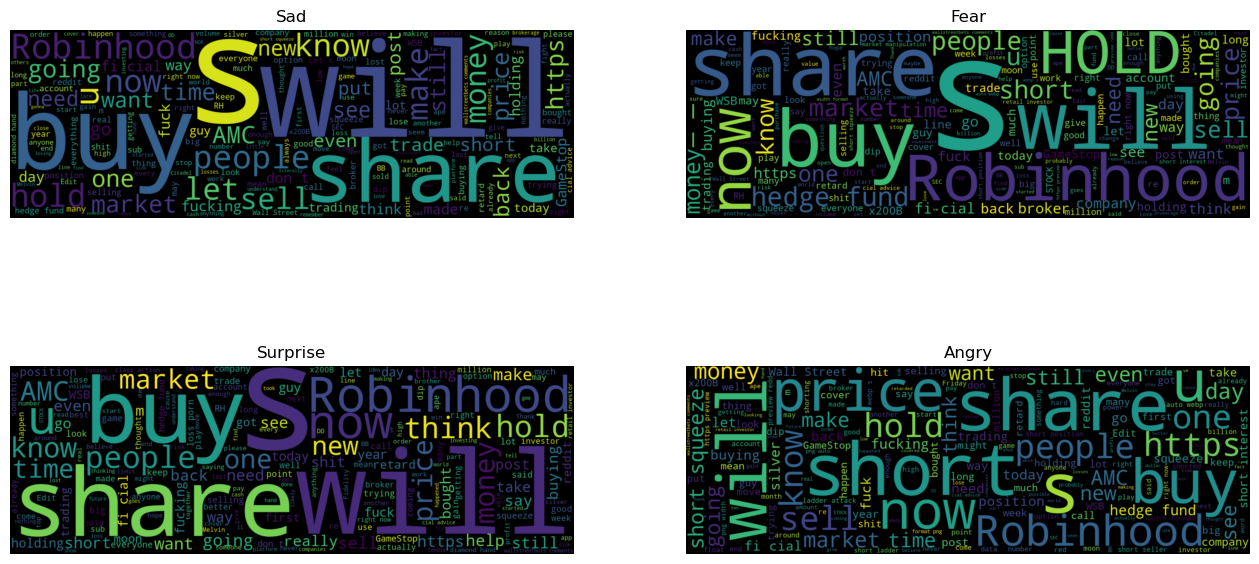

In [167]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8))
k=0
j=0
for i in ['Sad','Fear','Surprise','Angry']:
    dd=data[data['dominant_emotion']==i]
    text=" ".join(dd['overall_text'])
    text=text.replace("stock",' ')
    text=text.replace("GME"," ")
    text=text.replace("nan",' ')
    wordcloud = WordCloud(width=1500, height=500).generate(text)

    ax[k,j].imshow(wordcloud, interpolation='bilinear')
    ax[k,j].set_title(i)
    ax[k, j].set_axis_off()
    j+=1
    if j>1:
        k+=1
        j=0

Wordcloud shows the emotion of the posts Reddit users feel and the words associated with the sentiment. Sad posts contain the terms share, will short, sell,  buy and others. Fear posts contain the phrase hedge, short, hold, purchase and others. In the for loop, I replace the words GME, stocks and nan with nothing because the Reddit posts are mainly about the GME stock, and we have a lot of missing words in the body paragraph of the posts.
I didn't want to clutter the word clouds with GME, stocks and nan values.

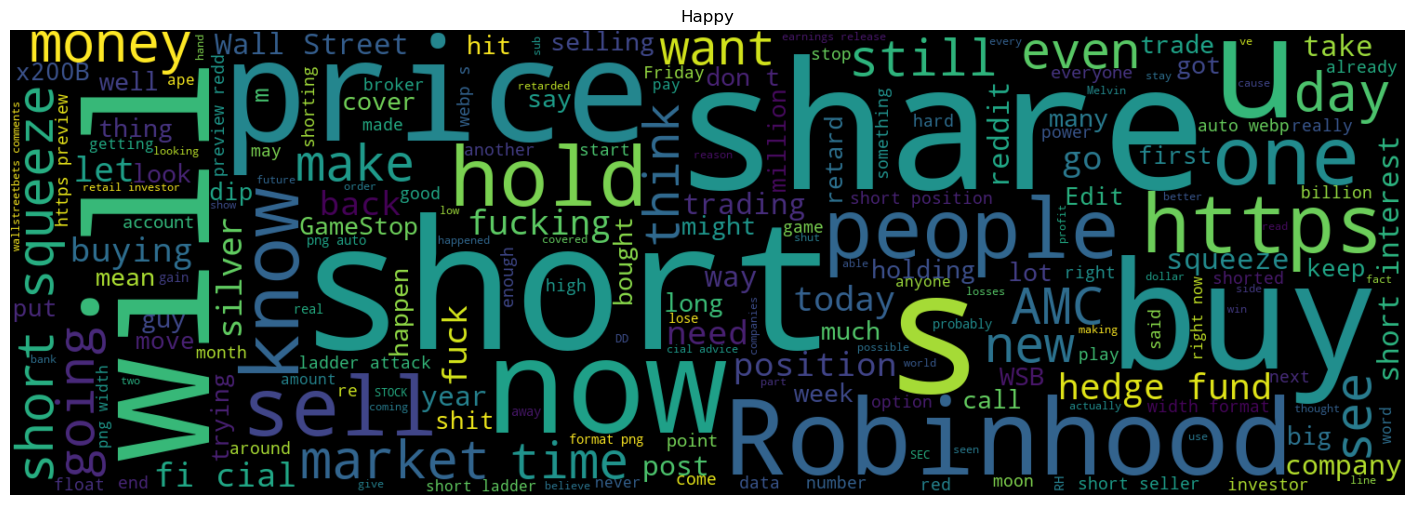

In [176]:
dd =data[data['dominant_emotion']=='Happy']
text= ' '.join(dd['overall_text'])
text=text.replace('stock','')
text=text.replace('GME','')
text=text.replace('nan','')
worldcloud=WordCloud(width=1500,height=500).generate(text)

plt.figure(figsize=(18,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Happy')
plt.axis('off')
plt.show()

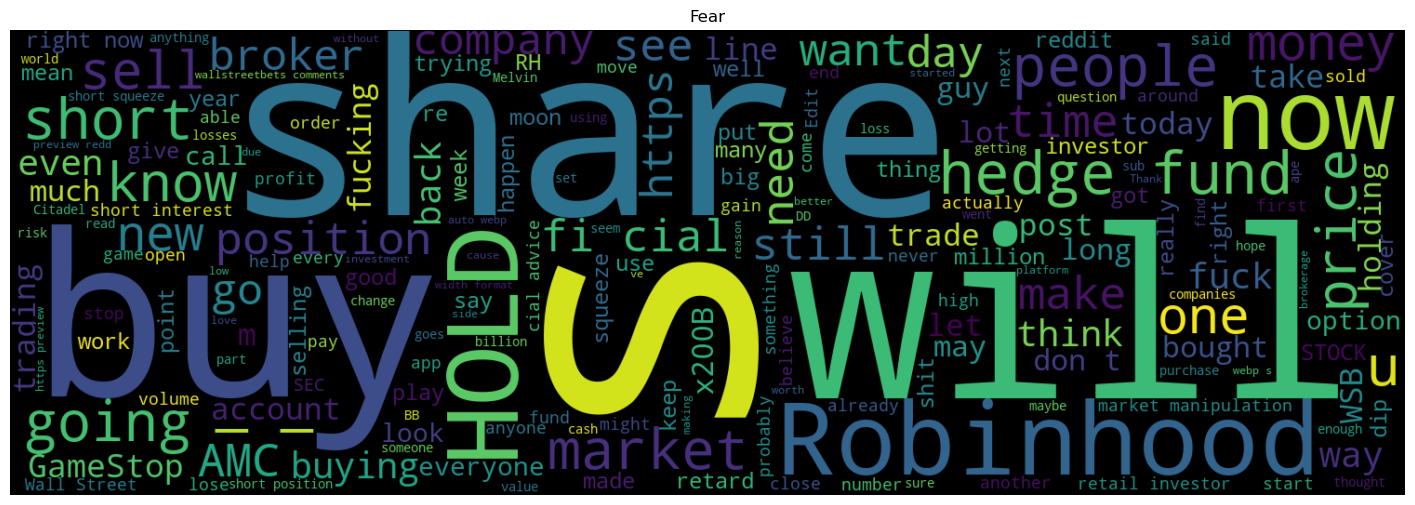

In [181]:
dd = data[data['dominant_emotion']=='Fear']
text= ' '.join(dd['overall_text'])
text=text.replace('stock',' ')
text=text.replace('GME',' ')
text=text.replace('nan',' ')
wordcloud=WordCloud(height=500,width=1500).generate(text)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Fear')
plt.axis('Off')
plt.show()